In [336]:
import pandas as pd

In [337]:
path = "./data"

In [338]:
df = pd.read_csv(path + '/' + "./file.csv", header=None)

In [339]:
df.rename(columns={0: 'centerX'}, inplace=True)
df.rename(columns={1: 'centerY'}, inplace=True)
df.rename(columns={2: 'radius'}, inplace=True)

In [340]:
df

,centerX,centerY,radius
0,654.52,592.76,11.920
1,695.99,577.47,13.069
2,771.97,549.48,12.475
3,816.54,532.59,12.953
4,861.12,516.34,12.026
...,...,...,...
70,1625.90,323.87,12.715
71,1662.60,309.70,12.007
72,1700.70,295.31,11.782
73,1760.80,271.84,10.851


In [341]:
import cv2

In [342]:
bolt_holes_info = df

In [343]:
# bolt_holes_info['centerX'] = cX_lst
# bolt_holes_info['centerY'] = cY_lst
# bolt_holes_info['radius'] = radius_lst

In [344]:
# bolt_holes_info['sum'] = bolt_holes_info['centerX'] + bolt_holes_info['centerY']

In [345]:
# bolt_holes_info = bolt_holes_info.sort_values(by=['sum'])

In [346]:
# bolt_holes_info

In [347]:
# condition = (bolt_holes_info['centerX'] > bolt_holes_info['centerX'].shift(1)) & (bolt_holes_info['centerY'] < bolt_holes_info['centerY'].shift(1))

In [348]:
# one_row_bolts = bolt_holes_info[condition]

In [349]:
import numpy as np

In [350]:
# one_row_bolts = bolt_holes_info[:25].sort_values(by=['centerY'])
# two_row_bolts = bolt_holes_info[25:50].sort_values(by=['centerX'])
# three_row_bolts = bolt_holes_info[50:].sort_values(by=['centerX'])

In [351]:
one_row_bolts = bolt_holes_info[:25]

In [352]:
one_row_bolts

,centerX,centerY,radius
0,654.52,592.76,11.920
1,695.99,577.47,13.069
2,771.97,549.48,12.475
3,816.54,532.59,12.953
4,861.12,516.34,12.026
5,905.31,499.67,12.598
6,948.56,483.45,11.385
7,1036.10,451.06,11.261
8,1078.50,435.04,10.290
9,1120.60,419.34,10.777


In [353]:
radius = bolt_holes_info['radius'].mean()

In [354]:
radius

12.050360000000001

In [355]:
import matplotlib.pyplot as plt
import cv2

In [356]:
img = np.zeros((2000, 2000, 3), np.uint8)

In [357]:
for i in range(len(one_row_bolts)):
    centerX = int(one_row_bolts['centerX'].iloc[i])
    centerY = int(one_row_bolts['centerY'].iloc[i])
    radius = int(radius)
    
    img = cv2.circle(img, (centerX, centerY), radius, (255, 255, 0), 3)
    

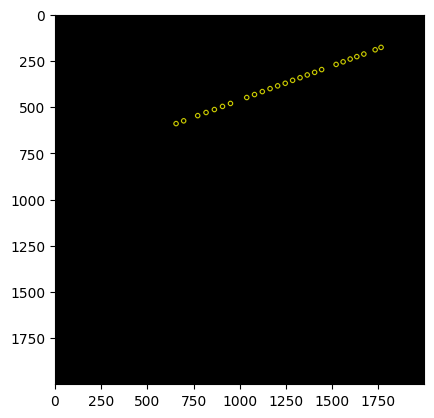

In [358]:
plt.imshow(img)
plt.show()

In [359]:
!pip3 install shapely

In [360]:
from shapely.geometry import LineString
from shapely.geometry import Point

In [361]:
x1 = one_row_bolts['centerX'].iloc[0]
y1 = one_row_bolts['centerY'].iloc[0]

In [362]:
x2 = one_row_bolts['centerX'].iloc[-1]
y2 = one_row_bolts['centerY'].iloc[-1]

In [363]:
line = LineString([(x1, y1), (x2, y2)])

In [364]:
p1 = Point(x1, y1)

In [365]:
c1 = p1.buffer(radius).boundary

In [366]:
i = c1.intersection(line)

In [367]:
len(i.xy)

2

In [368]:
found_x = int(i.xy[0][0])

In [369]:
found_y = int(i.xy[1][0])

In [370]:
img = cv2.circle(img, (found_x, found_y), 1, (255, 0, 0), 3)

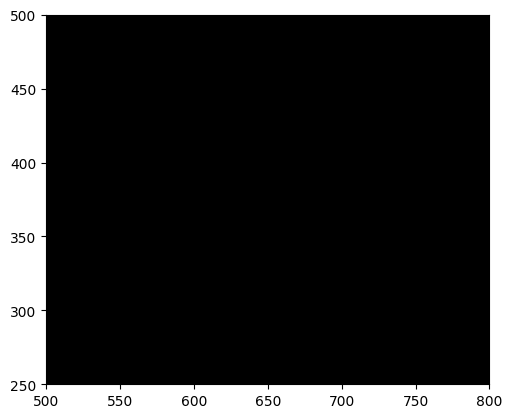

In [371]:
plt.imshow(img)
plt.xlim(500, 800)
plt.ylim(250, 500)
plt.show()

In [372]:
img = np.zeros((2000, 2000, 3), np.uint8)

In [373]:
for i in range(len(bolt_holes_info)):
    centerX = int(bolt_holes_info['centerX'].iloc[i])
    centerY = int(bolt_holes_info['centerY'].iloc[i])
    radius = int(radius)
    
    img = cv2.circle(img, (centerX, centerY), radius, (255, 255, 255), 3)

In [374]:
found_x1_x_l = []
found_y1_x_l = []

found_x2_x_l = []
found_y2_x_l = []

In [375]:
found_x1_y_l = []
found_y1_y_l = []

found_x2_y_l = []
found_y2_y_l = []

In [376]:
bolt_holes_info

,centerX,centerY,radius
0,654.52,592.76,11.920
1,695.99,577.47,13.069
2,771.97,549.48,12.475
3,816.54,532.59,12.953
4,861.12,516.34,12.026
...,...,...,...
70,1625.90,323.87,12.715
71,1662.60,309.70,12.007
72,1700.70,295.31,11.782
73,1760.80,271.84,10.851


In [377]:
for i in range(0, len(bolt_holes_info) // 25):
    for j in range(0 + (len(bolt_holes_info) // 3 * i), len(bolt_holes_info) // 3 * (i + 1) - 1):    
        x1 = bolt_holes_info['centerX'].iloc[j]
        y1 = bolt_holes_info['centerY'].iloc[j]

        x2 = bolt_holes_info['centerX'].iloc[j + 1]
        y2 = bolt_holes_info['centerY'].iloc[j + 1]
        
        p1 = Point(x1, y1)
        p2 = Point(x2, y2)
        
        c1 = p1.buffer(radius).boundary
        c2 = p2.buffer(radius).boundary

        line = LineString([(x1, y1), (x2, y2)])

        i1 = c1.intersection(line)
        i2 = c2.intersection(line)

        found_x1_x = int(i1.xy[0][0])
        found_y1_x = int(i1.xy[1][0])

        found_x1_x_l.append(found_x1_x)
        found_y1_x_l.append(found_y1_x)

        found_x2_x = int(i2.xy[0][0])
        found_y2_x = int(i2.xy[1][0])

        found_x2_x_l.append(found_x2_x)
        found_y2_x_l.append(found_y2_x)

        img = cv2.circle(img, (found_x1_x, found_y1_x), 2, (0, 255, 0), 3)
        img = cv2.circle(img, (found_x2_x, found_y2_x), 2, (255, 0, 0), 3)    

In [378]:
for i in range(0, len(bolt_holes_info) // 25 - 1):
    for j in range(0, len(bolt_holes_info) // 3):    
        x1 = bolt_holes_info['centerX'].iloc[j + (len(bolt_holes_info) // 3 * i)]
        y1 = bolt_holes_info['centerY'].iloc[j + (len(bolt_holes_info) // 3 * i)]

        x2 = bolt_holes_info['centerX'].iloc[j + (len(bolt_holes_info) // 3 * (i + 1))]
        y2 = bolt_holes_info['centerY'].iloc[j + (len(bolt_holes_info) // 3 * (i + 1))]
        
        p1 = Point(x1, y1)
        p2 = Point(x2, y2)
        
        c1 = p1.buffer(radius).boundary
        c2 = p2.buffer(radius).boundary

        line = LineString([(x1, y1), (x2, y2)])

        i1 = c1.intersection(line)
        i2 = c2.intersection(line)

        found_x1_y = int(i1.xy[0][0])
        found_y1_y = int(i1.xy[1][0])

        found_x1_y_l.append(found_x1_y)
        found_y1_y_l.append(found_y1_y)

        found_x2_y = int(i2.xy[0][0])
        found_y2_y = int(i2.xy[1][0])

        found_x2_y_l.append(found_x2_y)
        found_y2_y_l.append(found_y2_y)

        img = cv2.circle(img, (found_x1_y, found_y1_y), 2, (0, 255, 0), 3)
        img = cv2.circle(img, (found_x2_y, found_y2_y), 2, (255, 0, 0), 3)    

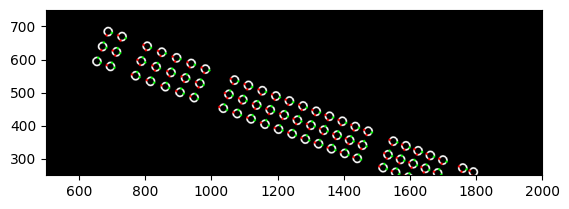

In [379]:
plt.imshow(img)
plt.xlim(500, 2000)
plt.ylim(250, 750)
plt.show()

In [380]:
len(found_x1_x_l)

72

In [381]:
len(found_x1_y_l)

50

In [382]:
len(found_x2_x_l)

72

In [383]:
len(found_x2_y_l)

50

In [384]:
found_x_coordinates = pd.DataFrame(columns = ['found_x1', 'found_y1', 'found_x2', 'found_y2'])
found_y_coordinates = pd.DataFrame(columns = ['found_x1_y', 'found_y1_y', 'found_x2_y', 'found_y2_y'])

In [385]:
found_x_coordinates['found_x1'] = found_x1_x_l
found_x_coordinates['found_y1'] = found_y1_x_l

found_y_coordinates['found_x1_y'] = found_x1_y_l
found_y_coordinates['found_y1_y'] = found_y1_y_l

found_x_coordinates['found_x2'] = found_x2_x_l
found_x_coordinates['found_y2'] = found_y2_x_l

found_y_coordinates['found_x2_y'] = found_x2_y_l
found_y_coordinates['found_y2_y'] = found_y2_y_l

In [386]:
found_x_coordinates

,found_x1,found_y1,found_x2,found_y2
0,665,588,684,581
1,707,573,760,553
2,783,545,805,536
3,827,528,849,520
4,872,512,894,503
...,...,...,...,...
67,1599,333,1614,328
68,1637,319,1651,314
69,1673,305,1689,299
70,1711,290,1749,276


In [387]:
found_y_coordinates

,found_x1_y,found_y1_y,found_x2_y,found_y2_y
0,658,603,667,626
1,700,588,709,610
2,776,560,784,582
3,820,543,829,565
4,865,527,873,548
5,909,510,917,531
6,952,494,961,514
7,1040,462,1048,482
8,1082,446,1090,466
9,1125,430,1132,450


In [388]:
found_x_coordinates.to_csv("./found_x_coordinates.csv")
found_y_coordinates.to_csv("./found_y_coordinates.csv")